# PC b-tagging SF exploration

**Motivation:** We have these new MNTs that now have information saved about the SFs for the quantiles, but I still need to figure out how to use them - so that's what I'm in the process of doing right now, sort of as a sanity check seeing if I can take the PC SFs that I've saved and reconstruct what's getting saved for the fixed WP SFs.

In [1]:
import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
from matplotlib import gridspec

import uproot

# import os
# os.sys.path.append("../code")
#from AnalysisUtils import nanoToDf

%load_ext autoreload
%autoreload 2

In [2]:
filename = "../../public/hh4b/bTagOptStudies/user.rateixei.HH4B.450000.SM_HH.MC16a-2015-2016.AB21.2.91-JAN20-0.pflow_vr_MiniNTuple.root/user.rateixei.20415213._000001.MiniNTuple.root"
#filename = "../../public/hh4b/test/mc16_13TeV.450000.aMcAtNloHerwig7EvtGen_UEEE5_CTEQ6L1_CT10ME_hh_bbbb.deriv.DAOD_EXOT8.e7107_s3126_r10201_p4006.root"

f = uproot.open(filename)
tree = f["XhhMiniNtuple"]

In [3]:
for k in tree.keys():
    print(k)

b'runNumber'
b'eventNumber'
b'lumiBlock'
b'coreFlags'
b'bcid'
b'mcEventNumber'
b'mcChannelNumber'
b'mcEventWeight'
b'NPV'
b'actualInteractionsPerCrossing'
b'averageInteractionsPerCrossing'
b'weight_pileup'
b'correctedAverageMu'
b'correctedAndScaledAverageMu'
b'correctedActualMu'
b'correctedAndScaledActualMu'
b'rand_run_nr'
b'rand_lumiblock_nr'
b'passedTriggerHashes'
b'nresolvedJets'
b'resolvedJets_E'
b'resolvedJets_pt'
b'resolvedJets_phi'
b'resolvedJets_eta'
b'resolvedJets_NumTrkPt1000PV'
b'resolvedJets_SumPtTrkPt1000PV'
b'resolvedJets_TrackWidthPt1000PV'
b'resolvedJets_NumTrkPt500PV'
b'resolvedJets_SumPtTrkPt500PV'
b'resolvedJets_TrackWidthPt500PV'
b'resolvedJets_JVFPV'
b'resolvedJets_JvtJvfcorr'
b'resolvedJets_JvtRpt'
b'resolvedJets_Jvt'
b'resolvedJets_JvtPass_Loose'
b'resolvedJets_JvtEff_SF_Loose'
b'resolvedJets_JvtPass_Medium'
b'resolvedJets_JvtEff_SF_Medium'
b'resolvedJets_JvtPass_Tight'
b'resolvedJets_JvtEff_SF_Tight'
b'resolvedJets_fJvtPass_Medium'
b'resolvedJets_fJvtEff_SF_Medi

Ok, let's load in the columns and see what's going on!

In [5]:
cols = ['HadronConeExclTruthLabelID','pt']
cols+= [f'Quantile_{tagger}_{WP}' if WP =='Continuous' else f'is_{tagger}_FixedCutBEff_{WP}' \
        for tagger in ['MV2c10','DL1'] for WP in ['60','70','77','85','Continuous']]

treeCols = [f'resolvedJets_{c}' for c in cols]

arrays = tree.arrays(['resolvedJets_pt','resolvedJets_Quantile_MV2c10_Continuous'])

print('Creating the df')
df = tree.pandas.df(treeCols)
df.columns = cols

SF_cols = [f'SF_{tagger}_{WP}' if WP=='Continuous' else f'SF_{tagger}_FixedCutBEff_{WP}' \
           for tagger in ['MV2c10','DL1'] for WP in ['60','70','77','85','Continuous']]

print('Getting the SFs')
for c in SF_cols:
    df[c] = np.concatenate(tree.array('resolvedJets_'+c)).squeeze()

print('Getting the mcEventWeight')
df['mcEventWeight'] = np.concatenate([[evtWt]*njets for _,evtWt,njets in tree.pandas.df(['mcEventWeight','nresolvedJets']).itertuples()])
    

Creating the df
Getting the SFs
Getting the mcEventWeight


In [6]:
len(df.index)

4112409

In [7]:
df.loc[0]

HadronConeExclTruthLabelID          pt  is_MV2c10_FixedCutBEff_60  \
subentry                                                                      
0                                  5  246.175079                          1   
1                                  0  155.880219                          0   
2                                  5  113.322868                          0   
3                                  0   40.853405                          0   
4                                  5   26.527580                          1   

          is_MV2c10_FixedCutBEff_70  is_MV2c10_FixedCutBEff_77  \
subentry                                                         
0                                 1                          1   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 1                          1   

          is_MV2c10_FixedCutBEff_85  Quantile_MV2c10_Continuous  \
subentry                                                          
0                                 1                           5   
1                                 0                           1   
2                                 1                           2   
3                                 0                           1   
4                                 1                           5   

          is_DL1_FixedCutBEff_60  is_DL1_FixedCutBEff_70  \
subentry                                                   
0                              1                       1   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              1                       1   

          is_DL1_FixedCutBEff_77  ...  SF_MV2c10_FixedCutBEff_70  \
subentry                          ...                              
0                              1  ...                   0.996277   
1                              0  ...                   0.998909   
2                              0  ...                   1.012805   
3                              0  ...                   0.999116   
4                              1  ...                   0.989450   

          SF_MV2c10_FixedCutBEff_77  SF_MV2c10_FixedCutBEff_85  \
subentry                                                         
0                          0.993315                   0.995879   
1                          0.997385                   0.991347   
2                          1.020471                   0.996607   
3                          0.998158                   0.993516   
4                          0.983511                   0.991188   

          SF_MV2c10_Continuous  SF_DL1_FixedCutBEff_60  \
subentry                                                 
0                       1.0025                0.984718   
1                       0.9960                1.000000   
2                       1.0169                0.995198   
3                       0.9960                1.000000   
4                       0.9234                0.987211   

          SF_DL1_FixedCutBEff_70  SF_DL1_FixedCutBEff_77  \
subentry                                                   
0                       0.995553                0.993698   
1                       0.999511                0.999149   
2                       1.002676                1.009824   
3                       0.999650                0.998652   
4                       0.981170                0.982376   

          SF_DL1_FixedCutBEff_85  SF_DL1_Continuous  mcEventWeight  
subentry                                                            
0                       0.999866             0.9898       0.030706  
1                       0.996866             0.9970       0.030706  
2                       0.999775             1.0352       

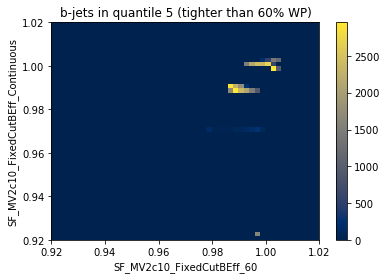

In [28]:
# It only makes sense to make this plot for b-jets
mask = (df.Quantile_MV2c10_Continuous==5)&(df.HadronConeExclTruthLabelID==5)

plt.figure()
plt.hist2d(df.loc[mask,'SF_MV2c10_FixedCutBEff_60'],
           df.loc[mask,'SF_MV2c10_Continuous'],50,[[.92,1.02],[.92,1.02]],
           cmap='cividis',weights=df.loc[mask,'mcEventWeight'])
plt.xlabel('SF_MV2c10_FixedCutBEff_60')
plt.ylabel('SF_MV2c10_FixedCutBEff_Continuous')
plt.title(f'b-jets in quantile 5 (tighter than 60% WP)')
plt.colorbar()
plt.savefig('figures/SF_PC_vs_fixed60_bjets_Q5.pdf')
plt.show()

In [14]:
np.linspace(.92,1.02,51)

array([0.92 , 0.922, 0.924, 0.926, 0.928, 0.93 , 0.932, 0.934, 0.936,
       0.938, 0.94 , 0.942, 0.944, 0.946, 0.948, 0.95 , 0.952, 0.954,
       0.956, 0.958, 0.96 , 0.962, 0.964, 0.966, 0.968, 0.97 , 0.972,
       0.974, 0.976, 0.978, 0.98 , 0.982, 0.984, 0.986, 0.988, 0.99 ,
       0.992, 0.994, 0.996, 0.998, 1.   , 1.002, 1.004, 1.006, 1.008,
       1.01 , 1.012, 1.014, 1.016, 1.018, 1.02 ])

In [15]:
np.sum(mask)

1501945

In [16]:
mask = (df.Quantile_MV2c10_Continuous==5)&(df.HadronConeExclTruthLabelID==5)

In [18]:
np.unique(df.loc[mask,'SF_MV2c10_Continuous'])

array([0.9234, 0.9703, 0.9896, 0.9898, 0.9919, 0.9984, 1.0009, 1.0013,
       1.0025], dtype=float32)

In [19]:
np.unique(df.loc[mask,'SF_MV2c10_FixedCutBEff_60'])

array([0.9784038 , 0.9789308 , 0.97945374, 0.97997266, 0.9804876 ,
       0.9809986 , 0.98150563, 0.98200876, 0.98250794, 0.98300326,
       0.98349476, 0.9839824 , 0.98446625, 0.98494625, 0.9854225 ,
       0.9858949 , 0.98636365, 0.98682857, 0.9872897 , 0.9873959 ,
       0.9873993 , 0.98740226, 0.9874124 , 0.9874183 , 0.98743516,
       0.98744404, 0.98746765, 0.98747927, 0.9875096 , 0.987524  ,
       0.98756105, 0.987578  , 0.9876217 , 0.98764104, 0.9876915 ,
       0.98771304, 0.9877472 , 0.9877702 , 0.9877937 , 0.9878576 ,
       0.9878828 , 0.9879534 , 0.98798   , 0.98805743, 0.9880851 ,
       0.9881694 , 0.98819774, 0.98820084, 0.98828894, 0.9883176 ,
       0.98841584, 0.98844445, 0.98854977, 0.9885778 , 0.98865074,
       0.98869044, 0.9887174 , 0.9888375 , 0.9888629 , 0.98899055,
       0.98901385, 0.9890968 , 0.98914945, 0.98917   , 0.9893137 ,
       0.989331  , 0.9894831 , 0.98949647, 0.98953915, 0.9896573 ,
       0.98966604, 0.9898359 , 0.98983943, 0.98997766, 0.99001

In parallel, I would like to check this plot for l-jets.

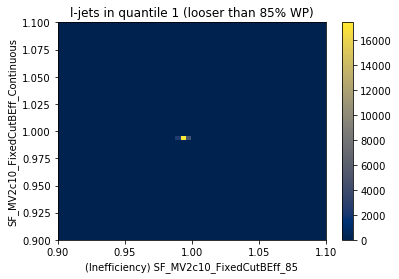

In [24]:
# It only makes sense to make this plot for b-jets
m1 = (df.Quantile_MV2c10_Continuous==1)&(df.HadronConeExclTruthLabelID==0)

plt.figure()
plt.hist2d(df.loc[m1,'SF_MV2c10_FixedCutBEff_85'],
           df.loc[m1,'SF_MV2c10_Continuous'],50,[[.9,1.1],[.9,1.1]],
           cmap='cividis',weights=df.loc[m1,'mcEventWeight'])
plt.xlabel('(Inefficiency) SF_MV2c10_FixedCutBEff_85')
plt.ylabel('SF_MV2c10_FixedCutBEff_Continuous')
plt.title(f'l-jets in quantile 1 (looser than 85% WP)')
plt.colorbar()
plt.show()

In [25]:
np.unique(df.loc[m1,'SF_MV2c10_Continuous'])

array([0.996], dtype=float32)

In [26]:
np.unique(df.loc[m1,'SF_MV2c10_FixedCutBEff_85'])

array([0.98761827, 0.9876184 , 0.98761845, ..., 0.9967782 , 0.99677825,
       0.9967783 ], dtype=float32)

In [27]:
np.sum(m1)

1136334